<h1 style="text-align: center;"> BCSE417P Lab Assignment 4</h1>


**Name:** Siddarth Chandrasekar  
**Registration Number:** 21BAI1195  
**Date:** Novemeber 15, 2024

#### GitHub Repository

- Siddarth's GitHub Repository: https://github.com/SidInaSoup/MachineVision

---

In [1]:
import cv2
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

In [8]:
# Load the video
video_path = 'sample2.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise Exception("Error: Cannot open video")
else:
    print("Video loaded successfully")

Video loaded successfully


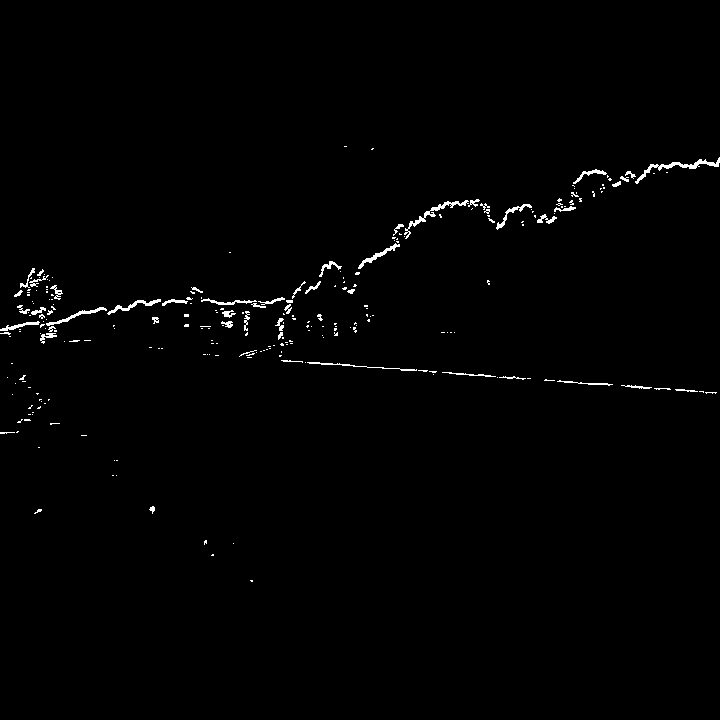

In [9]:
motion_threshold = 0.5
difference_threshold = 25

event_frames = []
frame_count = 0

while cap.isOpened():
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()
    frame_count += 1

    if not ret or frame2 is None:
        break

    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    diff = cv2.absdiff(gray1, gray2)
    _, motion_mask = cv2.threshold(diff, difference_threshold, 255, cv2.THRESH_BINARY)

    hist1 = cv2.calcHist([gray1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([gray2], [0], None, [256], [0, 256])
    hist_similarity = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

    if hist_similarity < motion_threshold or cv2.countNonZero(motion_mask) > 1000:
        event_frames.append(frame_count)
        timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        print(f"Event detected at {timestamp:.2f} seconds")

    motion_mask_rgb = cv2.cvtColor(motion_mask, cv2.COLOR_GRAY2RGB)
    motion_image = Image.fromarray(motion_mask_rgb)

    clear_output(wait=True)
    display(motion_image)

cap.release()

In [10]:
# Reload video to save results
cap = cv2.VideoCapture(video_path)

# Define VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = None  # Initialize video writer
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    frame_count += 1

    if not ret or frame is None:
        break

    # Annotate frames with detected events
    if frame_count in event_frames:
        timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        cv2.putText(frame, f"Event Detected at {timestamp:.2f}s", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Initialize VideoWriter
    if out is None:
        height, width = frame.shape[:2]
        out = cv2.VideoWriter('output.avi', fourcc, 20.0, (width, height))

    # Write the frame to the output video
    out.write(frame)

cap.release()
if out is not None:
    out.release()

print("Annotated video saved as 'output.avi'")

Annotated video saved as 'output.avi'


In [11]:
# Display detected events
if event_frames:
    print("Events were detected at the following frames:", event_frames)
else:
    print("No significant events were detected.")

Events were detected at the following frames: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 142, 143, 145, 146, 147]
